# Question 1

For this regression problem, we will try two models: XGBoost and Random Forest.

First of all, we want to load the train and test files to pandas dataframes and import some basic modules we will need.

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv") #read train file
test_df = pd.read_csv("test.csv") #read test file
df.describe(include = 'all') #start working with train dataframe by describing it.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [3]:
df.head(10) #check first 10 records

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


We notice there are many missing values in our dataset. For example all our first 10 rows have NaN value for columns Alley and PoolQC and many NaNs in columns Fence and MiscFeature.

A starting point would be to count the percentage of NaNs per column in order to have a first view of our data

In [4]:
nans = df.isnull().sum().sort_values(ascending = False) #count nans per column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False) #calculate percentage of nulls per column
nan_df = pd.concat([nans, percent], axis=1, keys=['Number of NaNs', 'Percentage']) #store result in dataframe nan_df
nan_df.head(10) #print top 10 columns according to percentage of nans in decreasing order

,Number of NaNs,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We decide to drop the columns Alley, PoolQC, Fence and MiscFeature because they have a very high percentage of missing values.

In [5]:
df = df.drop(['Alley',  'PoolQC', 'Fence', 'MiscFeature'], axis = 1) #drop selected columns
df.head(10) #check first 10 records

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


Now we will calculate the Pearson correlation coefficient between the SalePrice column and each column.

In [6]:
df_corr = df.corr()['SalePrice'][:-1].sort_values(ascending = False)
df_corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

At first we decide to choose the columns with correlation value greater than 0.4 for predicting SalePrice value. These are the following:
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces.

We should also check whether these columns are also correated with each other in order to keep a minimum number of less correlated columns that can predict the outcome.

In [7]:
top_df_corr =  df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']].corr()
top_df_corr.head(10)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.373066,0.269141
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.363936,0.339519
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.344501,0.410531
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.484557,0.276833,0.243671
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.148112,0.280682,0.326114
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.825667,0.315707,0.147716
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000,0.642277,0.179618,0.112581


We notice that there is a high correlation (>80%)between :

TotRmsAbvGrd - GrLivArea (0.825489)
GarageCars - GarageArea (0.882475)
1stFlrSF - TotalBsmtSF (0.819530)
YearBuilt - GarageYrBlt (0.825667)

We decide to drop the columns that have the smallest correlation per each pair with the SalePrice value, as it was calculated in num_df_corr.

In [8]:
#Calculate difference between calculation with SalePrice column for each highly correltated pair 
#Keep the most correlated  with SalePrice
(df_corr.TotRmsAbvGrd - df_corr.GrLivArea, df_corr.GarageCars - df_corr.GarageArea, df_corr[
'1stFlrSF'] - df_corr.TotalBsmtSF, df_corr.YearBuilt - df_corr.GarageYrBlt) 

(-0.17490132203062736,
 0.016977758339989157,
 -0.0077283668672778472,
 0.036535655391634558)

For positive values I keep the first column and for negative the second (the one with the higher correlation value for each pair).

In [9]:
top_df_corr = top_df_corr.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt'], axis = 1) #drop one column from each correlated pair
top_df_corr

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
OverallQual,1.000000,0.593007,0.600671,0.537808,0.550600,0.572323,0.550684,0.411876,0.396765
GrLivArea,0.593007,1.000000,0.467247,0.454868,0.630012,0.199010,0.287389,0.390857,0.461679
GarageCars,0.600671,0.467247,1.000000,0.434585,0.469672,0.537850,0.420622,0.364204,0.300789
GarageArea,0.562022,0.468997,0.882475,0.486665,0.405656,0.478954,0.371600,0.373066,0.269141
TotalBsmtSF,0.537808,0.454868,0.434585,1.000000,0.323722,0.391452,0.291066,0.363936,0.339519
1stFlrSF,0.476224,0.566024,0.439317,0.819530,0.380637,0.281986,0.240379,0.344501,0.410531
FullBath,0.550600,0.630012,0.469672,0.323722,1.000000,0.468271,0.439046,0.276833,0.243671
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.285573,0.554784,0.095589,0.191740,0.280682,0.326114
YearBuilt,0.572323,0.199010,0.537850,0.391452,0.468271,1.000000,0.592855,0.315707,0.147716
YearRemodAdd,0.550684,0.287389,0.420622,0.291066,0.439046,0.592855,1.000000,0.179618,0.112581


Now we will import seaborn module to plot the distribution of our dataset regarding SalePrice column.

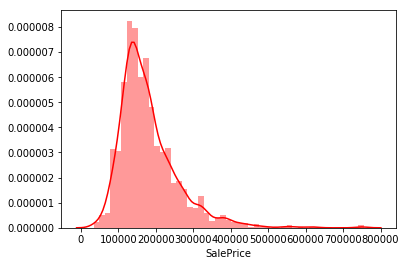

In [10]:
import seaborn as sns

sns.distplot(df['SalePrice'], color = 'red') #Plot SalePrice

We observe that our data has a long right tail. Therefore, we will use log function from numpy module to minimize the influence of extreme values to our predictions.

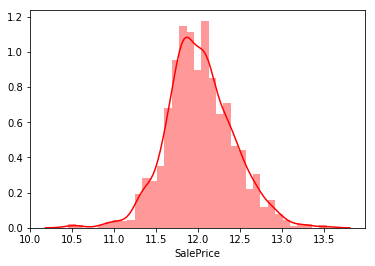

In [11]:
sns.distplot(np.log(df['SalePrice']), color = 'red') #use log to elimitate right tail

After applying log function to our data, we see that it tends to follow normal distribution which is very important for our prediction.

We will now apply filter function to keep only selected columns (those that were not eliminated at the previous step).

In [12]:
final_df = df.filter(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces' , 'SalePrice'], axis = 1) #filter only needed columns
final_df.head(10) #select top 10 records

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,SalePrice
0,7,1710,2,856,2,2003,2003,196.0,0,208500
1,6,1262,2,1262,2,1976,1976,0.0,1,181500
2,7,1786,2,920,2,2001,2002,162.0,1,223500
3,7,1717,3,756,1,1915,1970,0.0,1,140000
4,8,2198,3,1145,2,2000,2000,350.0,1,250000
5,5,1362,2,796,1,1993,1995,0.0,0,143000
6,8,1694,2,1686,2,2004,2005,186.0,1,307000
7,7,2090,2,1107,2,1973,1973,240.0,2,200000
8,7,1774,2,952,2,1931,1950,0.0,2,129900
9,5,1077,1,991,1,1939,1950,0.0,2,118000


Now we will keep the same column for our test dataframe.

In [13]:
test_df = test_df.filter(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces'], axis = 1)
test_df.head(10) #select top 10 records

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
0,5,896,1.0,882.0,1,1961,1961,0.0,0
1,6,1329,1.0,1329.0,1,1958,1958,108.0,0
2,5,1629,2.0,928.0,2,1997,1998,0.0,1
3,6,1604,2.0,926.0,2,1998,1998,20.0,1
4,8,1280,2.0,1280.0,2,1992,1992,0.0,0
5,6,1655,2.0,763.0,2,1993,1994,0.0,1
6,6,1187,2.0,1168.0,2,1992,2007,0.0,0
7,6,1465,2.0,789.0,2,1998,1998,0.0,1
8,7,1341,2.0,1300.0,1,1990,1990,0.0,1
9,4,882,2.0,882.0,1,1970,1970,0.0,0


We will apply log function to train dataframe to be less affected by extreme values, as we saw from the plot previously.

In [14]:
final_df['SalePrice'] = np.log(final_df['SalePrice']) #use log functon to decrease outliers 

Now we will split into predictor and variable subsets.

In [15]:
x_ = final_df.iloc[:, :-1].values #columns that are used for prediction
y_ = final_df.iloc[:,9].values #prediction (SalePrice)
x_test = test_df.iloc[:, :9].values

We will import xgboost module.

In [16]:
import xgboost as xgb

C:\Users\leo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We will run regression with different parameters and calculate our prediction accuracy for each model (using score function) 

In [17]:
#use max_depth = 2 ,learning_rate=0.1 and 100 estimators
regr = xgb.XGBRegressor(max_depth = 2, learning_rate=0.1, n_estimators=100 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.887954683768 .


We will try to increase learning rate to 0.5 and keep all other parameters fixed.

#use max_depth = 2 ,learning_rate=0.5 and 100 estimators 
#increase learning rate to 0.5
regr = xgb.XGBRegressor(max_depth = 2, learning_rate=0.5, n_estimators=100 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.') 

Increasing learning rate to 0.5 and keeping all other parameters fixed, we improved accuracy from 0.888 to 0.915.
We will try to increase learning rate to 1.

In [18]:
#use max_depth = 2 ,learning_rate=1 and 100 estimators 
#increase learning rate to 1
regr = xgb.XGBRegressor(max_depth = 2, learning_rate=1, n_estimators=100 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.93616229267 .


Increasing learning rate to 1 and keeping all other parameters fixed, improved accuracy from 0.915 to 0.934.

We will now increase max_dep to 3.

In [19]:
#use max_depth = 3 ,learning_rate=1 and 100 estimators 
#increase max_depth rate to 3
regr = xgb.XGBRegressor(max_depth = 3, learning_rate=1, n_estimators=100 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.970790676743 .


Increasing max_depth  from 2 to 3 and keeping all other parameters fixed, improved accuracy from 0.934 to 0.972.

We will now increase max_dep to 5.

In [20]:
#use max_depth = 5 ,learning_rate=1 and 100 estimators 
#increase max_depth rate to 5
regr = xgb.XGBRegressor(max_depth = 5, learning_rate=1, n_estimators=100 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.998673550776 .


Increasing max_depth  from 2 to 3 and keeping all other parameters fixed, improved accuracy from 0.972 to 0.998.

We will now try to go on with increasing number of estimators from 100 to 200.

In [21]:
#use max_depth = 5 ,learning_rate=1 and 200 estimators 
#increase estimators to 200
regr = xgb.XGBRegressor(max_depth = 5, learning_rate=1, n_estimators=200 )
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.999669656907 .


We can see that adjusting parameters can increase model accuracy in levels near 100%. Of course this is not necessarily positive, since we have overfit our prediction to our train data.

We want to see how using default model parameters will affect accuracy.

In [22]:
#use default parameters
regr = xgb.XGBRegressor()
regr.fit(x_, y_)
xgboost_train_score = regr.score(x_,y_)
print('The score of XGBoost for train data set is',xgboost_train_score,'.')

The score of XGBoost for train data set is 0.907198081399 .


The model gives accuracy 0.908, a value far from 0.998 from previously customized parameters.   

We will know run predictions for Sale Prices of train and test datasets respectively:
    
For train dataset:

In [23]:
xgb_train_pred = regr.predict(x_)
xgb_train_pred = np.exp(xgb_train_pred)
xgb_train_pred

array([ 194904.40625 ,  156716.3125  ,  202539.25    , ...,  272957.84375 ,
        133412.84375 ,  134102.828125], dtype=float32)

For test dataset:

In [24]:
xgb_test_pred = regr.predict(x_test)
xgb_test_pred = np.exp(xgb_test_pred)
xgb_test_pred

array([ 119918.8515625,  138902.953125 ,  171981.53125  , ...,
        159499.5625   ,  117418.984375 ,  233285.828125 ], dtype=float32)

At this point, we will try to fit Random Forest Model to our sets using sklearn module. 

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)
rf.fit(x_, y_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

We got an error with description:
Input contains NaN, infinity or a value too large for dtype('float32').

So, we want to see if there null values in our initial dataframes from which we obtained the arrays we tried to fit.

In [26]:
final_df.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
SalePrice       0
dtype: int64

We found out that MasVnrArea has 8 records with null values. Since it is a very small number compared to the size of our data set, we will not exclude the column from our prediction dataframe.

Note: If it is strictly required to provide a prediction for all records, we should exculed MasVnrArea column from our model, estimate our (new) model again and come up with another approach if our new model is a bad fit to the SalePrice 

So, we will keep only the rows with finite values.

In [27]:
final_df = final_df[np.isfinite(final_df['MasVnrArea'])]

We will re-define x_ and y_ according to modified final_df.

In [28]:
x_ = final_df.iloc[:, :-1].values
y_ = final_df.iloc[:,9].values

Now we will try to run our model with different parameters to find the best fit.

In [29]:
rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0, n_jobs = -1 ) #use 50 estimators, not random-state and all cores available
rf.fit(x_, y_)
rf_train_score = rf.score(x_,y_)
print('The score of Random Forest for train data set is',rf_train_score,'.')

The score of Random Forest for train data set is 0.975962521001 .


In [30]:
rf = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0, n_jobs = -1 ) #use 150 estimators, not random-state and all cores available
rf.fit(x_, y_)
rf_train_score = rf.score(x_,y_)
print('The score of Random Forest for train data set is',rf_train_score,'.')

The score of Random Forest for train data set is 0.978043257704 .


In [31]:
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0, n_jobs = -1 ) #use 500 estimators, not random-state and all cores available
rf.fit(x_, y_)
rf_train_score = rf.score(x_,y_)
print('The score of Random Forest for train data set is',rf_train_score,'.')

The score of Random Forest for train data set is 0.978231060797 .


Increasing number of estimators, slighly increases our prediction accuracy. We should choose this number depending on the need for accuracy. For example , we should know how important would it be to improve our prediction accuracy from 97,7% to 97,8%?

We can also use default parameters for the Random Forest Regressor and check which parameters were used by the model.

In [32]:
rf = RandomForestRegressor() #use default parameters
rf.fit(x_, y_)
rf_train_score = rf.score(x_,y_)
print('The score of Random Forest for train data set is',rf_train_score,'.')

The score of Random Forest for train data set is 0.967191347625 .


In [33]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0, n_jobs = -1 ) #use 1000 estimators, not random-state and all cores available
rf.fit(x_, y_)
rf_train_score = rf.score(x_,y_)
print('The score of Random Forest for train data set is',rf_train_score,'.')
rf.get_params()

The score of Random Forest for train data set is 0.978367083513 .


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

As a result we will keep the default parameters set by the model which has the parameters provided above, getting accuracy of 0.9783 to our model.

We will know run predictions for Sale Prices of train and test datasets respectively:

For train dataset:

In [34]:
rf_train_pred = rf.predict(x_) #prediction for train dataset
rf_train_pred = np.exp(rf_train_pred) #use exp function to get real value since we used log function for our model
rf_train_pred #select result for train array

array([ 193115.51458701,  173984.53874202,  215756.30156013, ...,
        267155.25804777,  138165.79785433,  142553.19392142])

For test dataset:

In [35]:
rf_test_pred = rf.predict(x_test) #prediction for test dataset
rf_test_pred = np.exp(rf_test_pred)#use exp function to get real value since we used log function for our model
rf_test_pred #select result for tests array

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

We got the same error as before. We will check how many null values are there per column in order to check whether we will follow the same strategy(keep only finite value rows) or act in a different way.

In [36]:
test_df.isnull().sum() #count nans per column

OverallQual      0
GrLivArea        0
GarageCars       1
TotalBsmtSF      1
FullBath         0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
Fireplaces       0
dtype: int64

We also have one null value in columns GarageCars, TotalBsmtSF and 15 in MasVnrArea. Since the number is small, we will not include those rows.

In [37]:
test_df = test_df[np.isfinite(test_df['MasVnrArea'])] #remove records with nans for MasVnrArea column
test_df = test_df[np.isfinite(test_df['GarageCars'])] #remove records with nans for GarageCars column
test_df = test_df[np.isfinite(test_df['TotalBsmtSF'])] #remove records with nans for TotalBsmtSF column

We will define x_test again according to modified dataframe and then try to fit the model again.

In [38]:
x_test = test_df.iloc[:, :9].values #redefine x_test according to modified test_df dataframe

In [39]:
rf_test_pred = rf.predict(x_test) #prediction for test dataset
rf_test_pred = np.exp(rf_test_pred) #use exp function to get real value since we used log function for our model
rf_test_pred #select result for tests array

array([ 118113.49067144,  128285.746204  ,  173902.4264384 , ...,
        156843.39556464,  106685.99716699,  237865.3957241 ])

Evaluation of the methods.

First of all we see that Random Forest was better in terms of accuracy (0.97 vs 0.907) when used defalut parameters. 

In general terms, random forest is easier to use compared to XGBoost. It has fewer parameters which are auto-defined in a higher optimization level compared to XGBoost. It is also robust to missing values. The last benefit is not so important at this problem, since there are not many missing values in the datasets columns that we set as important for our prediction and we also developed a certific strategy regarding nans. 

The only potential weakness is there is higher chance for overfitting compared to XGBoost, based on the train set score percentage and due to higher optimization. But this is a risk we always take then using Random Forests.

On the other hand, XGBoosting is a robust model which can be often the best model in regression problems. Is is also more sensitive to outliers compared to Random Forest. Since we applied log function only to SalePrice column, there would be required more effort to adjust in the same manner all columns to improve our prediction. Finally, there are many more parameters to set than Random Forest. It is pretty clear that setting defalut parameters results in approximattely 90% accuracy, which in many occasions is an unacceptable rate. Having no mechanism for finding the right parameters, requires manually adjusting them and making it more difficult to avoid overfitting, since the limits are pretty unclear.

As a result, we end up choosing Random Forest as our model, not only for its better accuracy on the train data, but for its easiness to set up, its higher tolerance for outliers and its better default parameterization.

# Question 2

First of all, we will read the csv file and import required modules.

In [3]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

%matplotlib inline
from sklearn.cross_validation import train_test_split

fc_df = pd.read_csv("covtype.csv") #read csv file
fc_df.head(10) #select first 10 records

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


We will now have a look of the data description.

In [4]:
fc_df.describe(include = 'all') #describe data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


We will search for null values.

In [6]:
fc_df.isnull().sum() #count null values

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


We find out that there are no null values in our dataframe.

We will split the data randomly into two halves (train and test subsets).

In [7]:
train,test = train_test_split(fc_df,test_size=0.5,random_state=42) #use test size value =0.5 for two equal halves and number 42 as initial random state

At this point, we will check whether the hypothesis of same distribution in train and test subsets is met. We expect that it is true, based on the random way of spliting our initial set.

In [8]:
train.Cover_Type.describe() #describe train dataset

count    290506.000000
mean          2.049259
std           1.395786
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

In [9]:
test.Cover_Type.describe() #describe test dataset

count    290506.000000
mean          2.053682
std           1.397221
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

And graphically:

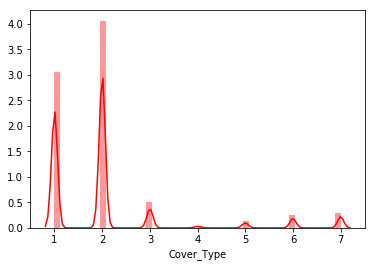

In [10]:
import seaborn as sns

sns.distplot(train['Cover_Type'], color = 'red') #plot train dataset Cover Type classification results

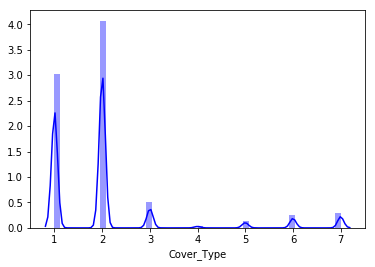

In [11]:
sns.distplot(test['Cover_Type'], color = 'blue') #plot test dataset Cover Type classification results

It seems that the two datasets come from the same distribution, but we will run ANOVA analysis to confirm this hypothesis.

We apply one-way Analysis of Variance to reject / not reject the Null Hypothesis using Confidence Factor 95%.

H0: Two halves come from the same distribution and have the same mean values (mean_test = mean_train).

H1: Two halves do not come from the same distribution and have different mean values (mean_test != mean_train)

In [12]:
from scipy import stats

stats.f_oneway(test['Cover_Type'], train['Cover_Type']) #run ANOVA with to get p-value

F_onewayResult(statistic=1.4572596178504866, pvalue=0.22736713933563679)

We got p-value = 0.22 > a = 0.05 so we do not reject the Null Hypothesis.

So we confirmed that distribution are similar for the two datasets and move on.

We can take a look at correlation between every column and Cover_Type to check whether there are columns that are highly linearly correlated to the Cover Type.

In [13]:
#select columns order by correlation_value with Cover Type in decreasing order
fc_df_corr = fc_df.corr()['Cover_Type'][:-1].sort_values(ascending = False) 
fc_df_corr 

Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Aspect       

At this example, there is not any characteristic with strong linear correlation to Cover_Type.

We do not have any particular finding until now, so we will proceed to our model fit.

In [15]:
X_train = train[train.columns[0:54]] #set first 54 columns as independent variables. 
X_train.head(10) #select first 10 records

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
196100,3134,293,14,175,3,3259,181,236,195,708,...,0,0,0,0,0,0,0,0,0,0
159717,3191,272,16,642,135,6110,175,243,206,1611,...,0,0,0,0,0,0,0,0,0,0
187218,3095,291,14,0,0,4462,180,237,197,1434,...,0,0,0,0,0,0,0,0,0,0
479374,3085,304,3,256,42,362,210,238,166,633,...,0,0,0,0,0,0,0,0,0,0
204566,3223,305,16,300,80,4629,175,230,194,1034,...,0,0,0,0,0,0,0,0,0,0
102347,3004,66,3,404,67,4796,222,233,147,1682,...,0,0,0,0,0,0,0,0,0,0
498993,2939,233,26,67,20,2809,168,252,212,2021,...,0,0,1,0,0,0,0,0,0,0
250128,3317,143,20,765,-30,1338,244,231,107,2601,...,0,0,0,0,0,0,0,0,1,0
177056,2967,272,12,108,4,2434,187,243,195,404,...,0,0,0,0,0,0,0,0,0,0
309235,3050,345,7,42,3,3158,206,229,161,2496,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y_train = train[train.columns[-1:]] #set last columns as the dependent variable we will predict (Cover Type). 
Y_train.head(10)#select first 10 records

,Cover_Type
196100,2
159717,2
187218,1
479374,1
204566,2
102347,2
498993,2
250128,1
177056,1
309235,1


We will apply the same process to our test dataframe.

In [17]:
X_test = test[test.columns[0:54]] #set first 54 columns as independent variables. 
X_test.head(10)#select first 10 records

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,0,1,0,0
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,0
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,0
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,0
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,0
251274,2050,284,42,170,141,192,75,201,246,255,...,0,0,0,0,0,0,0,0,0,0
52354,3004,236,5,960,95,5814,211,244,171,5713,...,0,0,0,0,0,0,0,0,0,0
246168,3232,111,10,541,78,1342,237,229,122,2270,...,0,0,0,0,0,0,0,1,0,0
477113,3141,156,6,503,72,240,228,241,147,1354,...,0,0,0,0,0,0,0,0,0,0
78834,2524,36,7,30,3,630,220,225,141,300,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y_test = test[test.columns[-1:]] #set last columns as the dependent variable we will predict (Cover Type). 
Y_test.head(10)#select first 10 records

,Cover_Type
250728,1
246788,2
407714,2
25713,2
21820,2
251274,3
52354,2
246168,1
477113,2
78834,2


We will use Random Forest Classifier from sklearn module.

In [19]:
from sklearn.ensemble import RandomForestClassifier

We have to convert Y_train into array.

In [20]:
Y_arr = np.array(Y_train.Cover_Type) #convert to array

We will do the same for test array.

In [21]:
Y_test_arr = np.array(Y_test.Cover_Type) #convert to array

At this point, we will run Random Forest Regression several times tuning parameters and checking model accuracy each time.

At this occasion we will tune two parameteres: number of parameters and max_depth. Of course we could do the same for all the available RandomForestClassifier parameters.

In [22]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=50, max_depth=5) #n_estimators=50, n_jobs=-1, max_depth = 5
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr
Y_train_pred = rfc.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = rfc.score(X_train,Y_arr) #prediction score in train data
print('The score of Random Forest Classifier for train data set is',y_train_pred_score,'.')
Y_test_pred = rfc.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = rfc.score(X_test,Y_test_arr)
print('The score of Random Forest Classifier for test data set is',y_test_pred_score,'.')

The score of Random Forest Classifier for train data set is 0.680953233324 .
The score of Random Forest Classifier for test data set is 0.677772576126 .


The accuracy we got is not very good. We will now try to increase the max_depth from 5 to 10.

In [58]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=50, max_depth=10) #n_estimators=50, n_jobs=-1, max_depth = 10
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr
Y_train_pred = rfc.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = rfc.score(X_train,Y_arr) #prediction score in train data
print('The score of Random Forest Classifier for train data set is',y_train_pred_score,'.')
Y_test_pred = rfc.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = rfc.score(X_test,Y_test_arr)
print('The score of Random Forest Classifier for test data set is',y_test_pred_score,'.')

The score of Random Forest Classifier for train data set is 0.755192663835 .
The score of Random Forest Classifier for test data set is 0.748146337769 .


There was important increase in the accuracy, so we will try to increase max_depth even more, to 50, since it seems to improve our model's accuracy.'

In [59]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=50, max_depth=50) #n_estimators=50, n_jobs=-1, max_depth = 50
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr
Y_train_pred = rfc.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = rfc.score(X_train,Y_arr) #prediction score in train data
print('The score of Random Forest Classifier for train data set is',y_train_pred_score,'.')
Y_test_pred = rfc.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = rfc.score(X_test,Y_test_arr)
print('The score of Random Forest Classifier for test data set is',y_test_pred_score,'.')

The score of Random Forest Classifier for train data set is 0.999982788652 .
The score of Random Forest Classifier for test data set is 0.942493442476 .


We can see that increasing max_depth number resulted in increasing accuracy in both train and test datasets.

We could try to reduce number of estimators to see whether there would be a significant decrease to our accuracy (of course we could do the opposite and increase number of estimators to test increase in accuracy).

We will reduce estimators to 20.

In [60]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=20, max_depth=50) #n_estimators=20, n_jobs=-1, max_depth = 50
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr
Y_train_pred = rfc.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = rfc.score(X_train,Y_arr) #prediction score in train data
print('The score of Random Forest Classifier for train data set is',y_train_pred_score,'.')
Y_test_pred = rfc.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = rfc.score(X_test,Y_test_arr)
print('The score of Random Forest Classifier for test data set is',y_test_pred_score,'.')

The score of Random Forest Classifier for train data set is 0.999480217276 .
The score of Random Forest Classifier for test data set is 0.937302499776 .


There was a slight decrease in accuracy, but the model ran almost at one third (1/3) of time compared to previous. Since it takes only a few seconds to run, we might would not want to sucrify even a little amount of efficiency to gain some seconds, but of course it depends on thr requirements.

Finally, we will test our model with the default parameters, since ist is very important to check how good prediction we can get, without having to manually tune the parameters. 

In [61]:
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr using default parameter values
Y_train_pred = rfc.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = rfc.score(X_train,Y_arr) #prediction score in train data
print('The score of Random Forest Classifier for train data set is',y_train_pred_score,'.')
Y_test_pred = rfc.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = rfc.score(X_test,Y_test_arr)
print('The score of Random Forest Classifier for test data set is',y_test_pred_score,'.')

The score of Random Forest Classifier for train data set is 0.999476775006 .
The score of Random Forest Classifier for test data set is 0.938462544663 .


The results are very good and similar to those we ended up after some parameter tuning. 

We are interest to see what kind of parameter values were used.

In [23]:
rfc.fit(X_train, Y_arr) #fit Random Forest Classifier  model to Y_arr

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

We find out that number of parameters was set to 20 and max_depth to 50. Consequently, we may have been quite lucky to end up with these values after a couple of efforts. This means that if we had chosen 'wrong' parameter values, we would not end up getting good accuracy. 

This is a good aspect of our model auto-parameter tuning for this example, since much more effort would might be required to end to such levels of accuracy if other parameters or different parameter values were used.

We will now use Support Vector Machine (SVM) for classification.

In [24]:
from sklearn import svm

We will use the default, radial, kernel and set cache_size = 7000MB and max_iter = 100 to limit on iterations within solver.

In [35]:
clf = svm.SVC(cache_size = 7000,max_iter = 100) #estimator clf stands for Classifier

We will fit the classifier to our model, run the model and calculate the accuracy.

In [38]:
import warnings #import warnings module
warnings.filterwarnings('ignore', 'Solver terminated early.*') #ignore respective warning. Too much time required to run otherwise

#fit Random Forest Classifier  model to Y_arr
clf.fit(X_train, Y_arr) #fit our model
Y_train_pred = clf.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = clf.score(X_train,Y_arr) #prediction score in train data
print('The score of SVM for train data set is',y_train_pred_score,'.')
Y_test_pred = clf.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = clf.score(X_test,Y_test_arr)
print('The score of SVM for test data set is',y_test_pred_score,'.')

The score of SVM for train data set is 0.138124513779 .
The score of SVM for test data set is 0.136572050147 .


We can see that in contrast to Random Forest Regression which completed in a few seconds, SVM would last much longer to provide useful results. There are also many parameters to adjust and auto-adjusting will not give a fast and reliable result.

We will try to run again our model with max_iter = 1000 instead of 100.

In [39]:
clf = svm.SVC(cache_size = 7000,max_iter = 1000) #estimator clf stands for Classifier

clf.fit(X_train, Y_arr) #fit our model
Y_train_pred = clf.predict(X_train) #predict training data. Results stored to Y_train_pred.
y_train_pred_score = clf.score(X_train,Y_arr) #prediction score in train data
print('The score of SVM for train data set is',y_train_pred_score,'.')
Y_test_pred = clf.predict(X_test) #predict Cover Type for our test Data
y_test_pred_score = clf.score(X_test,Y_test_arr)
print('The score of SVM for test data set is',y_test_pred_score,'.')

The score of SVM for train data set is 0.441333397589 .
The score of SVM for test data set is 0.431825848692 .


The score was improved but still it is not acceptable and the time required was very large (~25min). In order to get efficient predictions we should increase max_iter a lot, or set it to default -1 (unlimited) and probably tune other parameters. We will not try to run the model with default parameters, since it is going to exceed time limits required for the submission.

Conclusion: In  Forest Regression there are not many hyperparameters to tune (except for the number of trees). On the contrary, there are a lot of knobs to be turned in SVMs: Choosing the "right" kernel, regularization penalties, the slack variable, etc. 

Both models are non-parametric which means their complexity increasing according to the training sample size.


To summarize, random forests are much simpler to train and build a robust model. The complexity of a random forest grows with the number of trees in the forest, and the number of training samples we have. In SVMs, we typically need to do a fair amount of parameter tuning.

In addition, in SVM, the computational cost grows linearly with the number of classes as well, making it suitable for two-class classification problems. In this example, we have 7 distinct levels and a relatively large data size. Consequently, we end up consuming much more time not only for parameter tuning, but for model fitting calculations to take place. 

Since Random Forest Regression gives very good accuracy results, we would go with that option, for this particular problem.